In [25]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
# from scipy import stats
import pickle
# from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import StandardScaler
import h2o
import sys

In [3]:
data_path=r'C:\Users\MasteD17189\WORK\personal\kaggle git\data\ieee-fraud-detection'

# Input Data

In [10]:
#id TRAIN
id_train = pd.read_csv(data_path+'/train_identity.csv'
#                              ,delimiter = '\t'
#                              ,dtype = {'OS: Type Description':str, 'Manufacturer Desc':str,
#                                        'Quantity':float,'Fiscal Year Period (String)':str,'Contract Number':str,
#                                       'Equipment':str}
#                              ,parse_dates = ['DATETIME_CALL_RECEIVED']
#                                ,compression='gzip'      
#                                ,encoding='utf-8'
                             ,low_memory=False
)
print('train_identity.csv imported shape:\t',id_train.shape)

train_identity.csv imported shape:	 (144233, 41)


In [11]:
#transaction TRAIN
trans_train = pd.read_csv(data_path+'/train_transaction.csv'
#                              ,delimiter = '\t'
#                              ,dtype = {'OS: Type Description':str, 'Manufacturer Desc':str,
#                                        'Quantity':float,'Fiscal Year Period (String)':str,'Contract Number':str,
#                                       'Equipment':str}
#                              ,parse_dates = ['DATETIME_CALL_RECEIVED']
#                                ,compression='gzip'      
#                                ,encoding='utf-8'
                             ,low_memory=False
)
print('train_transaction.csv imported shape:\t',trans_train.shape)

train_transaction.csv imported shape:	 (590540, 394)


## join the 2 data sets

In [36]:
#join them
train=trans_train.merge(id_train, on='TransactionID', how='left',indicator=True)
#look at merge stats
train._merge.value_counts()

left_only     446307
both          144233
right_only         0
Name: _merge, dtype: int64

# Data exploration

In [20]:
train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_13,id_14,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,238269.000000,37627.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,589271.000000,309743.000000,327662.000000,421618.000000,280699.000000,73187.000000,38917.000000,74926.000000,74926.000000,514518.000000,311253.000000,64717.000000,61952.000000,62187.000000,501427.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,311253.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,514467.000000,421571.000000,421571.000000,421571.000000,421571.00000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,421571.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,513444.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,501376.000000,590226.000000,590226.00000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.000000,590226.0000

In [21]:
train.describe(include=[np.object])

,ProductCD,card4,card6,P_emaildomain,R_emaildomain,M1,M2,M3,M4,M5,M6,M7,M8,M9,id_12,id_15,id_16,id_23,id_27,id_28,id_29,id_30,id_31,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,590540,588963,588969,496084,137291,319440,319440,319440,309096,240058,421180,244275,244288,244288,144233,140985,129340,5169,5169,140978,140978,77565,140282,73289,77805,140985,140985,140985,140985,140810,118666
unique,5,4,4,59,60,2,2,2,3,2,2,2,2,2,2,3,2,3,2,2,2,75,130,260,4,2,2,2,2,2,1786
top,W,visa,debit,gmail.com,gmail.com,T,T,T,M0,F,F,F,F,T,NotFound,Found,Found,IP_PROXY:TRANSPARENT,Found,Found,Found,Windows 10,chrome 63.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
freq,439670,384767,439938,228355,57147,319415,285468,251731,196405,132491,227856,211374,155251,205656,123025,67728,66324,3489,5155,76232,74926,21155,22000,16874,60011,77814,134066,110452,73922,85165,47722


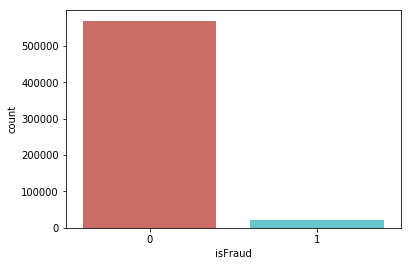

In [27]:
#distribution of target
sns.countplot(x='isFraud',data=train, palette='hls')

Unbalanced classes. We need to fix this.

# Data preparation

In [28]:
# #standardize the numeric variables (except for target)
# pd.concat(
#     [train.select_dtypes(exclude=[np.number]).reset_index(),
#      pd.DataFrame(data=StandardScaler().fit_transform(train.select_dtypes(include=[np.number])),columns=train.select_dtypes(include=[np.number]).columns).reset_index()
#     ],
#     axis=1
# ).drop(columns={'index'}).head()

In [38]:
#fill NA. Lazy version for now. Come back and do this more precisely. Maybe even have 2 models: those with identity and those without
# train.fillna(0).head()

# Modeling

## Simple GLM
Start with a simple GLM. I like H2Os linear estimator as it provides better insight into the predictors in early model-building stages

In [22]:
h2o.init()
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)56-b12)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\MASTED~1\AppData\Local\Temp\tmpwcf91mbm
  JVM stdout: C:\Users\MASTED~1\AppData\Local\Temp\tmpwcf91mbm\h2o_MasteD17189_started_from_python.out
  JVM stderr: C:\Users\MASTED~1\AppData\Local\Temp\tmpwcf91mbm\h2o_MasteD17189_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,05 secs
H2O cluster timezone:,America/Chicago
H2O data parsing timezone:,UTC
H2O cluster version:,3.24.0.3
H2O cluster version age:,2 months and 26 days
H2O cluster name:,H2O_from_python_MasteD17189_ng2s78
H2O cluster total nodes:,1
H2O cluster free memory:,3.531 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [39]:
#import into h2o frames
trainh2o= h2o.H2OFrame(train)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [40]:
trainh2o['isFraud']=trainh2o['isFraud'].asfactor()

In [71]:
x=trainh2o.columns
varlist=['isFraud','TransactionID','TransactionDT']
for var in varlist:
    x.remove(var)

In [82]:
x=['DeviceType','DeviceInfo','TransactionAmt','card1','card2']

In [83]:
subtrain,subtest=trainh2o.split_frame(ratios=[0.70], seed=413)

In [73]:
help(H2OGeneralizedLinearEstimator)

Help on class H2OGeneralizedLinearEstimator in module h2o.estimators.glm:

class H2OGeneralizedLinearEstimator(h2o.estimators.estimator_base.H2OEstimator)
 |  Generalized Linear Modeling
 |  
 |  Fits a generalized linear model, specified by a response variable, a set of predictors, and a
 |  description of the error distribution.
 |  
 |  A subclass of :class:`ModelBase` is returned. The specific subclass depends on the machine learning task
 |  at hand (if it's binomial classification, then an H2OBinomialModel is returned, if it's regression then a
 |  H2ORegressionModel is returned). The default print-out of the models is shown, but further GLM-specific
 |  information can be queried out of the object. Upon completion of the GLM, the resulting object has
 |  coefficients, normalized coefficients, residual/null deviance, aic, and a host of model metrics including
 |  MSE, AUC (for logistic regression), degrees of freedom, and confusion matrices.
 |  
 |  Method resolution order:
 |  

In [102]:
glm_model_reg = H2OGeneralizedLinearEstimator(
    family= "binomial",
    balance_classes=True,
    lambda_ = 0.0001, 
    compute_p_values = False,
    remove_collinear_columns=True
)

In [103]:
glm_model_reg.train(
    x,'isFraud', training_frame= subtrain, validation_frame=subtest)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [104]:
coef_out=glm_model_reg._model_json['output']['coefficients_table'].as_data_frame()
coef_out[np.abs(coef_out.coefficients)>0].sort_values(by='coefficients', ascending=False)

,names,coefficients,standardized_coefficients
1726,DeviceInfo.hi6210sft Build/MRA58K,4.170816,4.170816
1126,DeviceInfo.SM-A300H Build/LRX22G,3.243428,3.243428
1789,DeviceType.mobile,1.937616,1.937616
1788,DeviceType.desktop,1.929817,1.929817
1743,DeviceInfo.nan,0.039829,0.039829
1791,TransactionAmt,0.000656,0.155548
1792,card1,-0.000016,-0.080006
1793,card2,-0.000368,-0.058020
1771,DeviceInfo.rv:57.0,-0.076484,-0.076484
1599,DeviceInfo.Windows,-0.652804,-0.652804


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


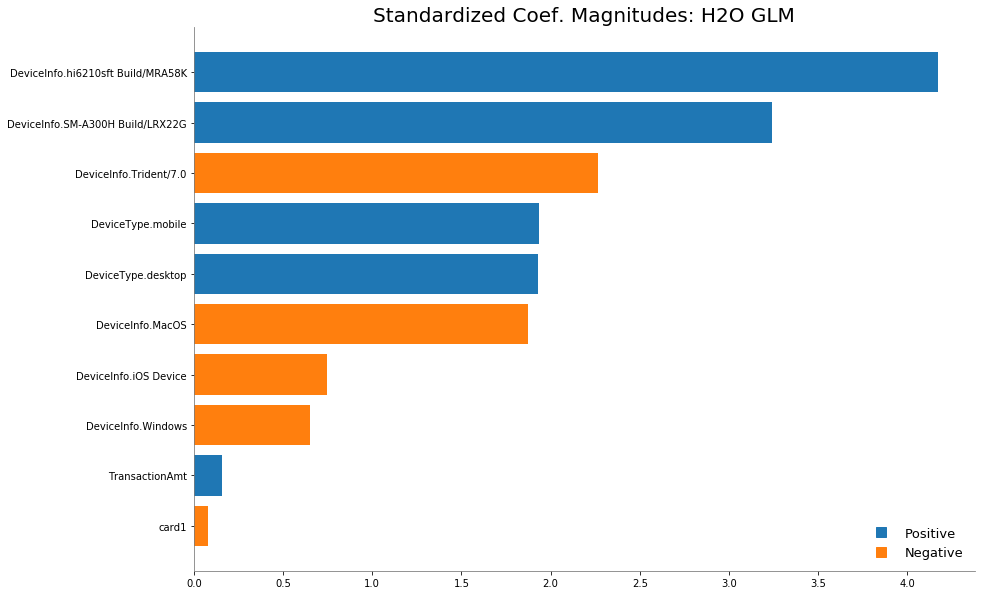

In [105]:
# plot the top 10
glm_model_reg.std_coef_plot(10)

In [112]:
glm_model_reg

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_model_python_1564778894347_21


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.032547937564081274
RMSE: 0.18041046966315805
LogLoss: 0.14035470868237837
Null degrees of freedom: 413604
Residual degrees of freedom: 413591
Null deviance: 126048.66865040193
Residual deviance: 116102.81856915021
AIC: 116130.81856915021
AUC: 0.7038748631916821
pr_auc: 0.11642298427926562
Gini: 0.40774972638336426
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1122739401966155: 


,0,1,Error,Rate
0,374356.0,24690.0,0.0619,(24690.0/399046.0)
1,10511.0,4048.0,0.722,(10511.0/14559.0)
Total,384867.0,28738.0,0.0851,(35201.0/413605.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1122739,0.1869876,140.0
max f2,0.0609728,0.2728970,242.0
max f0point5,0.1235951,0.1644504,113.0
max accuracy,0.7478170,0.9653026,18.0
max precision,0.8885705,0.9384615,3.0
max recall,0.0114909,1.0,398.0
max specificity,1.0000000,0.9999975,0.0
max absolute_mcc,0.0683845,0.1593809,219.0
max min_per_class_accuracy,0.0235391,0.6554022,330.0
max mean_per_class_accuracy,0.0268040,0.6726363,313.0


Gains/Lift Table: Avg response rate:  3.52 %, avg score:  3.64 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100071,0.1358778,5.9576987,5.9576987,0.2097125,0.1923107,0.2097125,0.1923107,0.0596195,0.0596195,495.7698662,495.7698662
,2,0.0200022,0.1310425,4.3774702,5.1680619,0.1540881,0.1330423,0.1819171,0.1626944,0.0437530,0.1033725,337.7470159,416.8061936
,3,0.0300021,0.1280943,4.1212120,4.8191401,0.1450677,0.1293953,0.1696349,0.1515956,0.0412116,0.1445841,312.1211988,381.9140074
,4,0.0400019,0.1256030,3.3931312,4.4626594,0.1194391,0.1270214,0.1570867,0.1454524,0.0339309,0.1785150,239.3131204,346.2659404
,5,0.0500187,0.1211245,4.0251067,4.3750347,0.1416848,0.1234034,0.1540023,0.1410369,0.0403187,0.2188337,302.5106744,337.5034662
,6,0.1000012,0.0780243,2.4007317,3.3882412,0.0845064,0.1063341,0.1192669,0.1236918,0.1199945,0.3388282,140.0731741,238.8241202
,7,0.1501312,0.0656007,2.0908635,2.9550368,0.0735989,0.0705603,0.1040180,0.1059507,0.1048149,0.4436431,109.0863463,195.5036757
,8,0.2000024,0.0559375,1.5535573,2.6055733,0.0546856,0.0610462,0.0917168,0.0947536,0.0774778,0.5211210,55.3557262,160.5573282
,9,0.3000036,0.0245947,1.0076120,2.0729195,0.0354682,0.0309314,0.0729673,0.0734796,0.1007624,0.6218834,0.7611969,107.2919511
,10,0.4,0.0227673,0.6442984,1.7157772,0.0226795,0.0235567,0.0603958,0.0609993,0.0644275,0.6863109,-35.5701615,71.5777182




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.031962353787318085
RMSE: 0.1787801828708039
LogLoss: 0.13872636623381304
Null degrees of freedom: 176934
Residual degrees of freedom: 176921
Null deviance: 53099.8985915967
Residual deviance: 49091.09921915943
AIC: 49119.09921915943
AUC: 0.6987150470532016
pr_auc: 0.11530408549781644
Gini: 0.3974300941064033
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11117014906722764: 


,0,1,Error,Rate
0,159919.0,10912.0,0.0639,(10912.0/170831.0)
1,4446.0,1658.0,0.7284,(4446.0/6104.0)
Total,164365.0,12570.0,0.0868,(15358.0/176935.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.1111701,0.1775731,136.0
max f2,0.0622521,0.2660344,233.0
max f0point5,0.1243162,0.1599141,103.0
max accuracy,0.7423160,0.9660440,17.0
max precision,0.7940420,0.9508197,6.0
max recall,0.0116402,1.0,398.0
max specificity,1.0000000,0.9999941,0.0
max absolute_mcc,0.0671894,0.1549918,217.0
max min_per_class_accuracy,0.0234451,0.6538336,328.0
max mean_per_class_accuracy,0.0271884,0.6698731,307.0


Gains/Lift Table: Avg response rate:  3.45 %, avg score:  3.65 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100037,0.1355756,6.0429963,6.0429963,0.2084746,0.1904411,0.2084746,0.1904411,0.0604522,0.0604522,504.2996257,504.2996257
,2,0.0200017,0.1309905,4.4405901,5.2420196,0.1531939,0.1328954,0.1808420,0.1616764,0.0443971,0.1048493,344.0590070,424.2019556
,3,0.0300054,0.1280363,3.7011305,4.7282931,0.1276836,0.1293668,0.1631192,0.1509045,0.0370249,0.1418742,270.1130499,372.8293123
,4,0.0400090,0.1253991,3.5537403,4.4346134,0.1225989,0.1269452,0.1529877,0.1449138,0.0355505,0.1774246,255.3740346,343.4613449
,5,0.0500014,0.1209271,3.7217125,4.2921461,0.1283937,0.1231728,0.1480728,0.1405690,0.0371887,0.2146134,272.1712507,329.2146074
,6,0.1000028,0.0786675,2.3000661,3.2961061,0.0793489,0.1065656,0.1137109,0.1235673,0.1150066,0.3296199,130.0066064,229.6106069
,7,0.1500664,0.0659250,2.2252175,2.9388474,0.0767668,0.0708538,0.1013860,0.1059816,0.1114024,0.4410223,122.5217477,193.8847439
,8,0.2,0.0563570,1.4501567,2.5671691,0.0500283,0.0613685,0.0885636,0.0948431,0.0724115,0.5134338,45.0156725,156.7169069
,9,0.3000085,0.0246545,1.0156413,2.0499639,0.0350381,0.0317317,0.0707208,0.0738048,0.1015727,0.6150066,1.5641289,104.9963914
,10,0.4,0.0227905,0.6422563,1.6980668,0.0221569,0.0235890,0.0585808,0.0612519,0.0642202,0.6792267,-35.7743717,69.8066841



Scoring History: 


,timestamp,duration,iterations,negative_log_likelihood,objective
,2019-08-02 16:22:25,0.000 sec,0,63024.3343252,0.1523781
,2019-08-02 16:22:25,0.202 sec,1,59410.1158804,0.1475106
,2019-08-02 16:22:25,0.315 sec,2,58668.3644981,0.1431184
,2019-08-02 16:22:25,0.419 sec,3,58051.4092846,0.1423422


In [109]:
glm_model_reg.auc(train=True)

0.7038748631916821

In [111]:
glm_model_reg.auc(valid=True)

0.6987150470532016

In [113]:
h2o.cluster().shutdown()

H2O session _sid_924f closed.
